In [ ]:
a = 339*12
print(a)

In [ ]:
b = 1095*4
print(b)

In [ ]:
c = a+b
print(c)

In [ ]:
s = c + 6000
print(s)

In [ ]:
o = 220.5*8
print(o)

In [ ]:
sum = s+o
print(sum)

291
291
71100
71100
619
619
1.1373


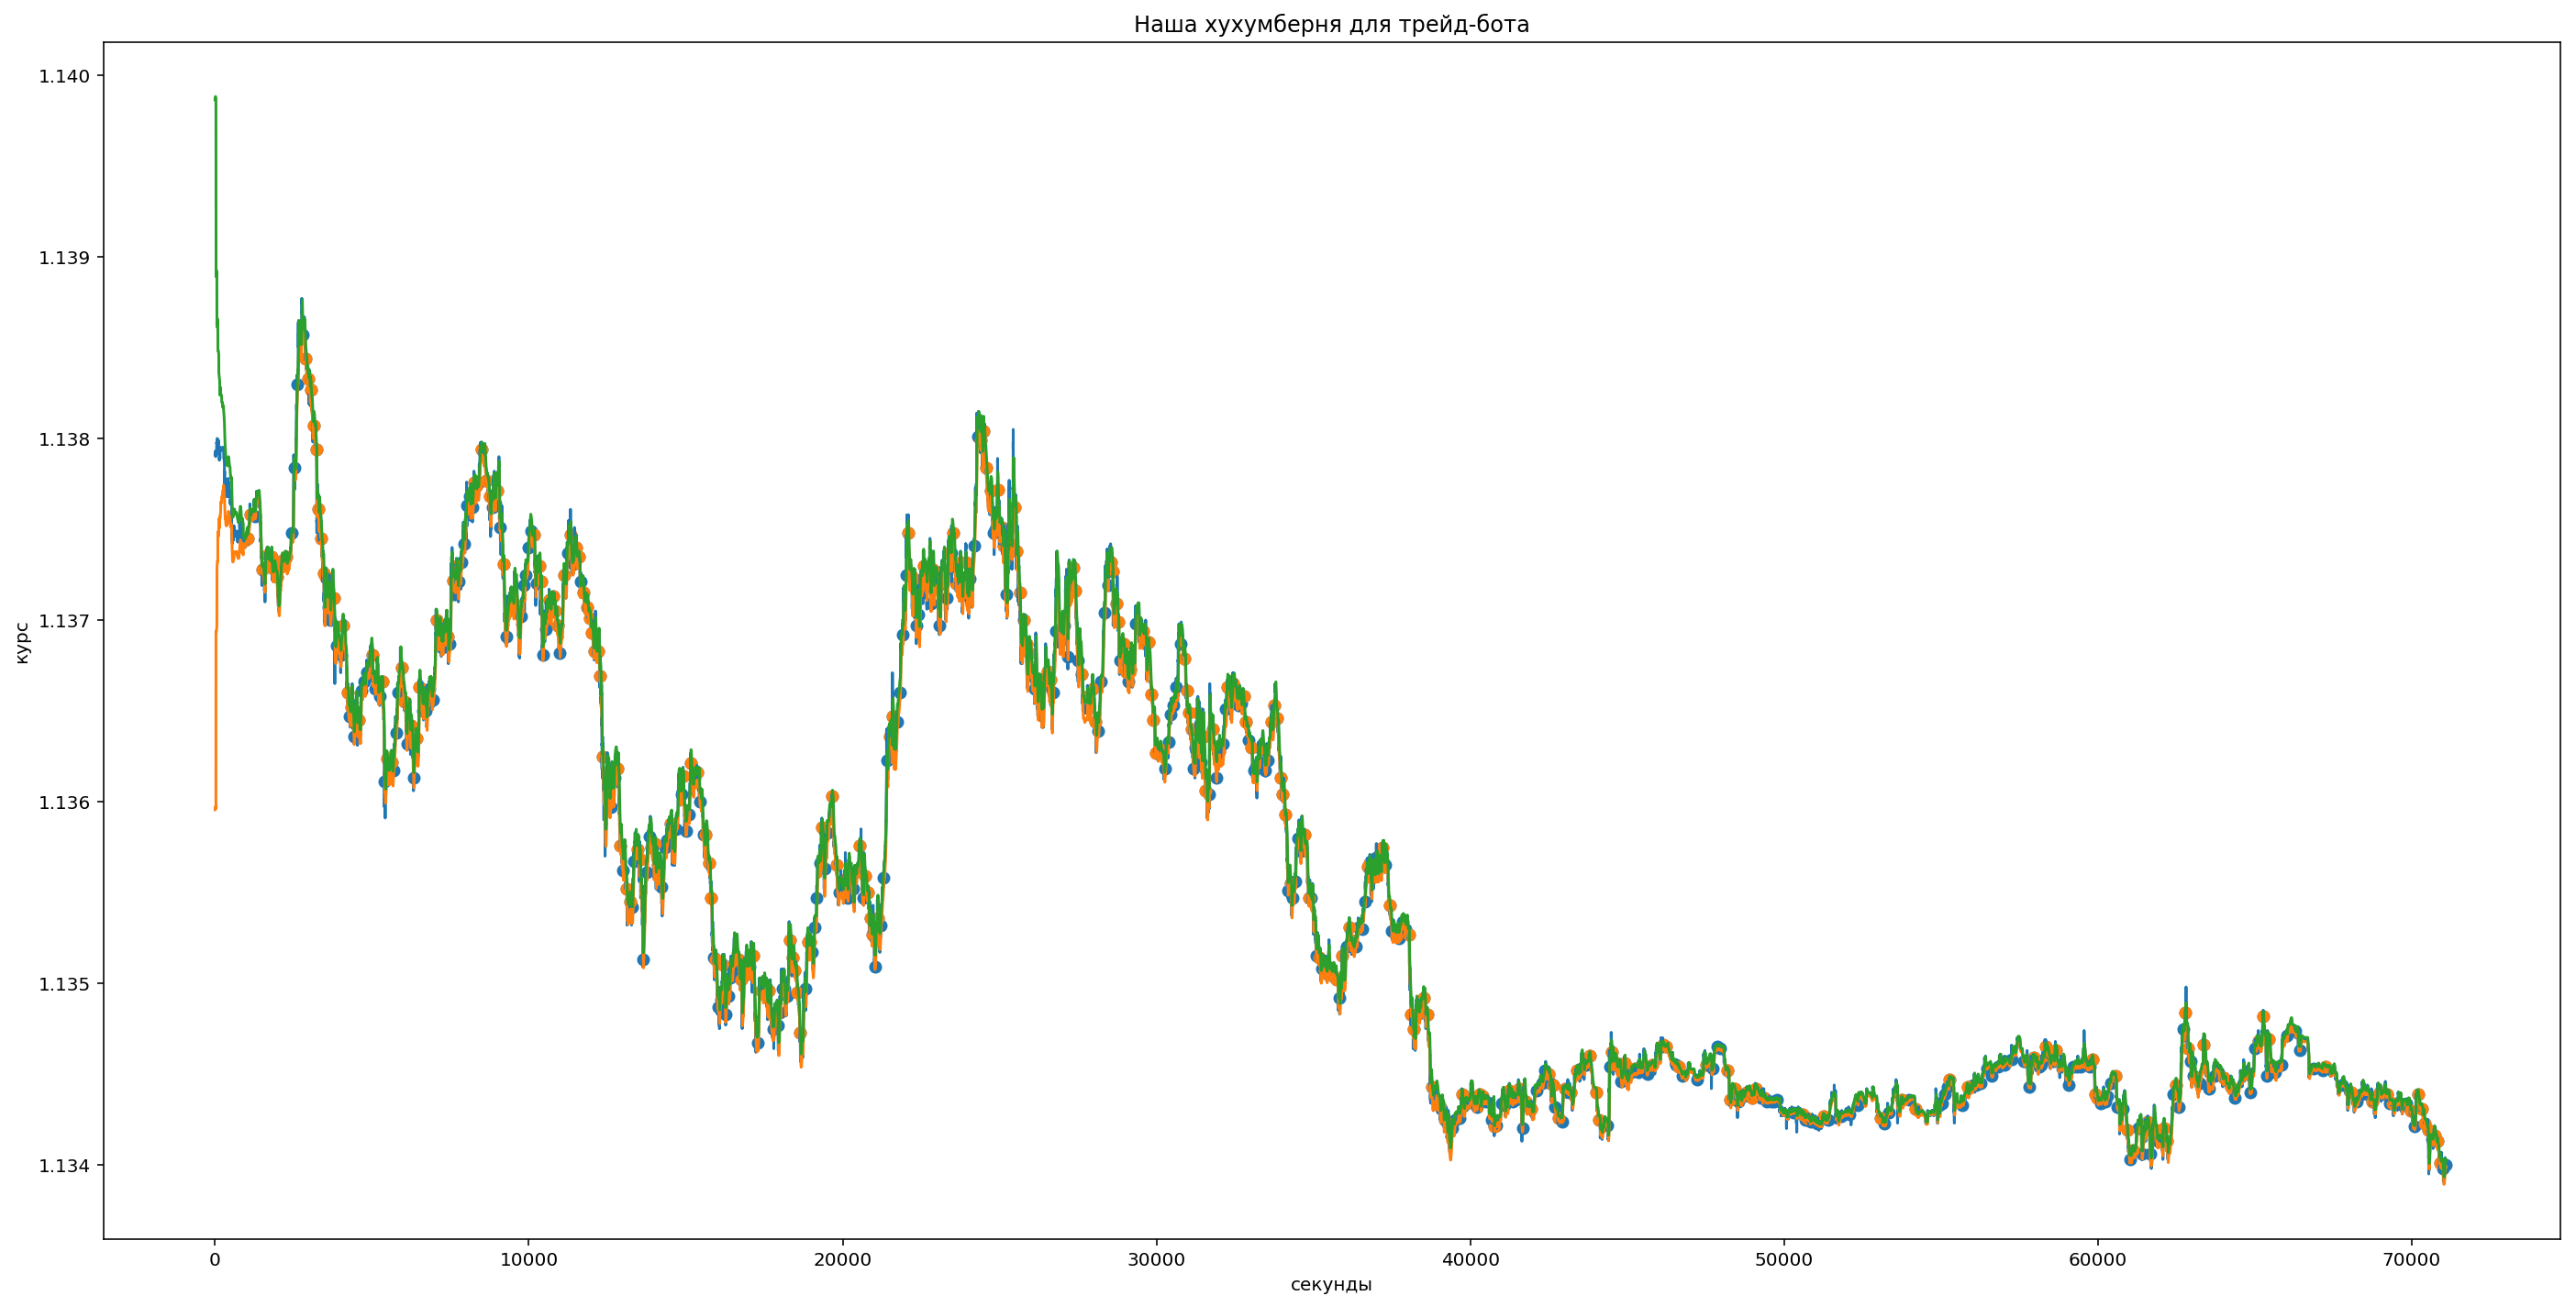

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

a = []
work_np = []
i = 0
j = 0
fi = 0
indexinger = 0
stavka = 0
stroka = ''
koridor = np.array([])
sr_zn_kor = np.array([])
sr_zn_kor_min = np.array([])
sr_zn_kor_max = np.array([])
prob_kor = np.array([])
our_index = np.array([])
uspech_stavki = np.array([])
neuspech_stavki = np.array([])
our_uspech_index = np.array([])
mnenie_mass = np.array([])
dinamika_mass = np.array([])
mass = []
is_stavka = False
stavka_vverh = False
stavka_vniz = False
is_prob_kor_vverh = False
is_prob_kor_vniz = False
our_ti = 30
our_kor_len = 20
our_wait = 3
kol_pov = 0
kol_pon = 0
porog_kol = 4
wait = 0
first = 0
last = 28000

f = open('OlimpGrafik4.txt')
for line in f:
    line = line.replace('\n', '')
    mass.append([line.split(': ')])

mass = np.array(mass)

mass_mod = mass[:,0][:,1]
mnenie_mass = mass[:,0][:,2]

mass_mod = np.array(mass_mod, dtype=float)
mnenie_mass = np.array(mnenie_mass, dtype=int)

last = len(mnenie_mass)

mnenie_mass = mnenie_mass[first:last]



viborka = mass_mod[first:last]

for stroka in viborka:
    
    if indexinger%our_ti == 0:
        dinamika = stroka-viborka[indexinger-our_ti]
        if dinamika<0:
            dinamika_mass = np.append(dinamika_mass, dinamika*(-1))
        else:
            dinamika_mass = np.append(dinamika_mass, dinamika)
            
        if len(dinamika_mass)>our_ti:
            dinamika_mass = np.delete(dinamika_mass, 0)
        #dinamika = 1.000119
        #print('Динамика : '+str(dinamika))
        
    koridor = np.append(koridor, stroka)
    sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
    dinamika_mean = np.mean(dinamika_mass)/2
    
    sr_zn_kor_min = np.append(sr_zn_kor_min, (np.mean(koridor)-dinamika_mean))
    sr_zn_kor_max = np.append(sr_zn_kor_max, (np.mean(koridor)+dinamika_mean))
    
    if len(koridor)>our_kor_len:
        koridor = np.delete(koridor, 0)
        
    if len(prob_kor)==0:
        per_pk = stroka
    else:
        per_pk = prob_kor[len(prob_kor)-1]
    
    #if stroka>sr_zn_kor_max[indexinger]:
    if stroka>sr_zn_kor_max[indexinger] and stavka == 0:
        is_prob_kor_vverh = True
        wait = our_wait
        strok_prob = stroka
            
    #elif stroka<sr_zn_kor_min[indexinger]:
    elif stroka<sr_zn_kor_min[indexinger] and stavka == 0:
        is_prob_kor_vniz = True
        wait = our_wait
        strok_prob = stroka
        
        
    if wait>0:
        if (is_prob_kor_vverh==True and wait<=1):
            if stroka>=koridor[len(koridor)-(our_wait-1)]:
                wait = our_wait
                strok_prob = stroka
                kol_pov+=1
                #print('подготовка вверх '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
            elif (stroka<koridor[len(koridor)-(our_wait-1)] and wait<=1):
                prob_kor = np.append(prob_kor, stroka)
                our_index = np.append(our_index, indexinger)
                stavka = 60
                is_stavka = True
                stavka_vverh = True
                #print('ставка вверх '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
                strok_prob = 0
                wait = 0
                kol_pon = 0
                
        elif (is_prob_kor_vniz==True and wait<=1):
            if stroka<=koridor[len(koridor)-our_wait]:
                wait = our_wait
                strok_prob = stroka
                kol_pon+=1
               #print('подготовка вниз '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
            elif (stroka>koridor[len(koridor)-(our_wait-1)] and wait<=1):
                prob_kor = np.append(prob_kor, stroka)
                our_index = np.append(our_index, indexinger)
                stavka = 60
                is_stavka = True
                stavka_vniz = True
               #print('ставка вниз '+str(strok_prob)+' '+str(stroka)+' '+str(indexinger))
                strok_prob = 0
                wait = 0
                kol_pov = 0
        wait-=1
            
    if stavka>0:
        stavka-=1
    
    if is_stavka == True and stavka == 0:
        if stavka_vverh == True:
            if per_pk>stroka:
                uspech_stavki = np.append(uspech_stavki, per_pk)
                our_uspech_index = np.append(our_uspech_index, indexinger-59)
            if per_pk<stroka:
                neuspech_stavki = np.append(neuspech_stavki, per_pk)
            stavka_vverh = False
        elif stavka_vniz == True:
            if per_pk<stroka:
                uspech_stavki = np.append(uspech_stavki, per_pk)
                our_uspech_index = np.append(our_uspech_index, indexinger-59)
            if per_pk>stroka:
                neuspech_stavki = np.append(neuspech_stavki, per_pk)
            stavka_vniz = False
        is_stavka = False
            
        
    indexinger+=1

print(len(uspech_stavki))
print(len(neuspech_stavki))
print(len(sr_zn_kor))
print(len(viborka))
print(len(prob_kor))
print(len(our_index))
print(mass_mod[1848+60])

plt.plot(mass_mod[first:last])
plt.plot(sr_zn_kor_min)
plt.plot(sr_zn_kor_max)
plt.scatter(our_index,prob_kor)
plt.scatter(our_uspech_index,uspech_stavki)
plt.xlabel('секунды')
plt.ylabel('курс')
plt.title('Наша хухумберня для трейд-бота')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.dpi"] = 144.0
plt.show()

In [5]:
a = 1000
i=0
m=0
sum = len(uspech_stavki)
anti_sum = len(neuspech_stavki)

m=((a*0.1)*0.82)*sum
n=(a*0.1)*anti_sum
    
print(m-n)
print(sum, anti_sum)

-2514.0
223 208


In [3]:
print(34115/3600)
print(60*0.476)

9.47638888888889
28.56


In [1]:
1+2

3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

a = []
work_np = []
i = 0
j = 0
fi = 0
indexinger = 0
stavka = 0
stroka = ''
koridor = np.array([])
sr_zn_kor = np.array([])
sr_zn_kor_min = np.array([])
sr_zn_kor_max = np.array([])
prob_kor = np.array([])
our_index = np.array([])
uspech_stavki = np.array([])
neuspech_stavki = np.array([])
our_uspech_index = np.array([])
mnenie_mass = np.array([])
dinamika_mass = np.array([])
effec = np.array([])
effec_our_ti = np.array([])
effec_j_mass = np.array([])
effec_our_kor = np.array([])
our_kor_search = np.array([])
mass = []
is_stavka = False
stavka_vverh = False
stavka_vniz = False
otobr = False
our_ti = 60
our_kor_len = 20
our_test = 181
first = 0
last = 300
sum_usp=0
sum_neusp=0

f = open('OlimpGrafik2.txt')
for line in f:
    line = line.replace('\n', '')
    mass.append([line.split(': ')])

mass = np.array(mass)

mass_mod = mass[:,0][:,1]
mnenie_mass = mass[:,0][:,2]

mass_mod = np.array(mass_mod, dtype=float)
mnenie_mass = np.array(mnenie_mass, dtype=int)


#last = len(mnenie_mass)

mnenie_mass = mnenie_mass
viborka = mass_mod


while last<len(mass_mod):
    
    mnenie_mass = mnenie_mass[first:last]
    viborka = mass_mod[first:last]

    while i<our_test:
    
        while j<our_test:
            otobr = False

            for stroka in viborka:

                if indexinger%our_ti == 0:
                    dinamika = stroka-viborka[indexinger-our_ti]
                    if dinamika<0:
                        dinamika_mass = np.append(dinamika_mass, dinamika*(-1))
                    else:
                        dinamika_mass = np.append(dinamika_mass, dinamika)

                    if len(dinamika_mass)>our_ti:
                        dinamika_mass = np.delete(dinamika_mass, 0)
                    #dinamika = 1.000119
                    #print('Динамика : '+str(dinamika))

                koridor = np.append(koridor, stroka)
                sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
                dinamika_mean = np.mean(dinamika_mass)

                sr_zn_kor_min = np.append(sr_zn_kor_min, (np.mean(koridor)-dinamika_mean))
                sr_zn_kor_max = np.append(sr_zn_kor_max, (np.mean(koridor)+dinamika_mean))

                if len(koridor)>our_kor_len:
                    koridor = np.delete(koridor, 0)

                if len(prob_kor)==0:
                    per_pk = stroka
                else:
                    per_pk = prob_kor[len(prob_kor)-1]

                if stroka>sr_zn_kor_max[indexinger] and stavka ==0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vverh = True

                elif stroka<sr_zn_kor_min[indexinger] and stavka ==0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vniz = True

                if stavka>0:
                    stavka-=1

                if is_stavka == True and stavka == 0:
                    if stavka_vverh == True:
                        if per_pk>stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk<stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vverh = False
                    elif stavka_vniz == True:
                        if per_pk<stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk>stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vniz = False
                    is_stavka = False


                indexinger+=1

            if len(prob_kor)>0:
                effec = np.append(effec, (len(uspech_stavki)/len(prob_kor))*100)
                effec_our_ti = np.append(effec_our_ti, our_ti)
                effec_our_kor = np.append(effec_our_kor, our_kor_len)
            else:
                effec = np.append(effec, 0)
                effec_our_ti = np.append(effec_our_ti, our_ti)
                effec_our_kor = np.append(effec_our_kor, our_kor_len)


            if j==0 and len(effec_j_mass)>0:
                print(effec_j_mass[len(effec_j_mass)-1], i, our_ti_search[len(our_ti_search)-1])
                
            if np.max(effec)>90:
                #print(effec_j_mass[len(effec_j_mass)-1], i, our_ti_search[len(our_ti_search)-1])
                j = our_test
                i = our_test
                otobr = True


            indexinger = 0
            stavka = 0
            koridor = np.array([])
            sr_zn_kor = np.array([])
            sr_zn_kor_min = np.array([])
            sr_zn_kor_max = np.array([])
            prob_kor = np.array([])
            our_index = np.array([])
            uspech_stavki = np.array([])
            neuspech_stavki = np.array([])
            our_uspech_index = np.array([])
            mnenie_mass = np.array([])
            dinamika_mass = np.array([])
            mass = []
            is_stavka = False
            stavka_vverh = False
            stavka_vniz = False

            j+=1
            our_ti = j



        our_ti_search = np.append(our_ti_search, effec_our_ti[np.where(effec == np.max(effec))[0][0]])
        our_kor_search = np.append(our_kor_search, effec_our_kor[np.where(effec == np.max(effec))[0][0]])
        effec_j_mass = np.append(effec_j_mass, np.max(effec))

        effec = np.array([])
        effec_our_ti = np.array([])
        j = 0
        
        i+=1
        our_kor_len = i
            
    our_ti = int(our_ti_search[np.where(effec_j_mass == np.max(effec_j_mass))[0][0]])
    our_kor_len = int(our_kor_search[np.where(effec_j_mass == np.max(effec_j_mass))[0][0]])
    
    if otobr == True:
        
        for stroka in viborka:

                if indexinger%our_ti == 0:
                    dinamika = stroka-viborka[indexinger-our_ti]
                    if dinamika<0:
                        dinamika_mass = np.append(dinamika_mass, dinamika*(-1))
                    else:
                        dinamika_mass = np.append(dinamika_mass, dinamika)

                    if len(dinamika_mass)>our_ti:
                        dinamika_mass = np.delete(dinamika_mass, 0)
                    #dinamika = 1.000119
                    #print('Динамика : '+str(dinamika))

                koridor = np.append(koridor, stroka)
                sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
                dinamika_mean = np.mean(dinamika_mass)

                sr_zn_kor_min = np.append(sr_zn_kor_min, (np.mean(koridor)-dinamika_mean))
                sr_zn_kor_max = np.append(sr_zn_kor_max, (np.mean(koridor)+dinamika_mean))

                if len(koridor)>our_kor_len:
                    koridor = np.delete(koridor, 0)

                if len(prob_kor)==0:
                    per_pk = stroka
                else:
                    per_pk = prob_kor[len(prob_kor)-1]

                if stroka>sr_zn_kor_max[indexinger] and stavka ==0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vverh = True

                elif stroka<sr_zn_kor_min[indexinger] and stavka ==0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vniz = True

                if stavka>0:
                    stavka-=1

                if is_stavka == True and stavka == 0:
                    if stavka_vverh == True:
                        if per_pk>stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk<stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vverh = False
                    elif stavka_vniz == True:
                        if per_pk<stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk>stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vniz = False
                    is_stavka = False


                indexinger+=1
        
                print(len(uspech_stavki))
                print(len(neuspech_stavki))
                print(len(sr_zn_kor))
                print(len(viborka))
                print(len(sr_zn_kor_min))
                print(len(prob_kor))
                print(len(our_index))

                plt.plot(mass_mod[first:last])
                plt.plot(sr_zn_kor_min)
                plt.plot(sr_zn_kor_max)
                plt.scatter(our_index,prob_kor)
                plt.scatter(our_uspech_index,uspech_stavki)
                plt.xlabel('секунды')
                plt.ylabel('курс')
                plt.title('Наша хухумберня для трейд-бота')
                fig_size = plt.rcParams["figure.figsize"]
                fig_size[0] = 24
                fig_size[1] = 12
                plt.rcParams["figure.figsize"] = fig_size
                plt.rcParams["figure.dpi"] = 144.0
                plt.show()

                sum_usp+=len(uspech_stavki)
                sum_neusp+=len(neuspech_stavki)
                sum_stavok = sum_usp+sum_neusp
                
    our_ti_search = np.array([])
    our_kor_search = np.array([])
    effec_j_mass = np.array([])
    
    first+=300
    last+=300
    
    print(first, last)
    i = 0

KeyboardInterrupt: 

In [31]:
a = 1000
i=0
m=0
sum = sum_usp
anti_sum = sum_neusp

m=((a*0.1)*0.82)*sum
n=(a*0.1)*anti_sum
    
print(m-n)
print(sum, anti_sum)

-1206.0
167 149


237
210
28000
28000
467
467
1.14103


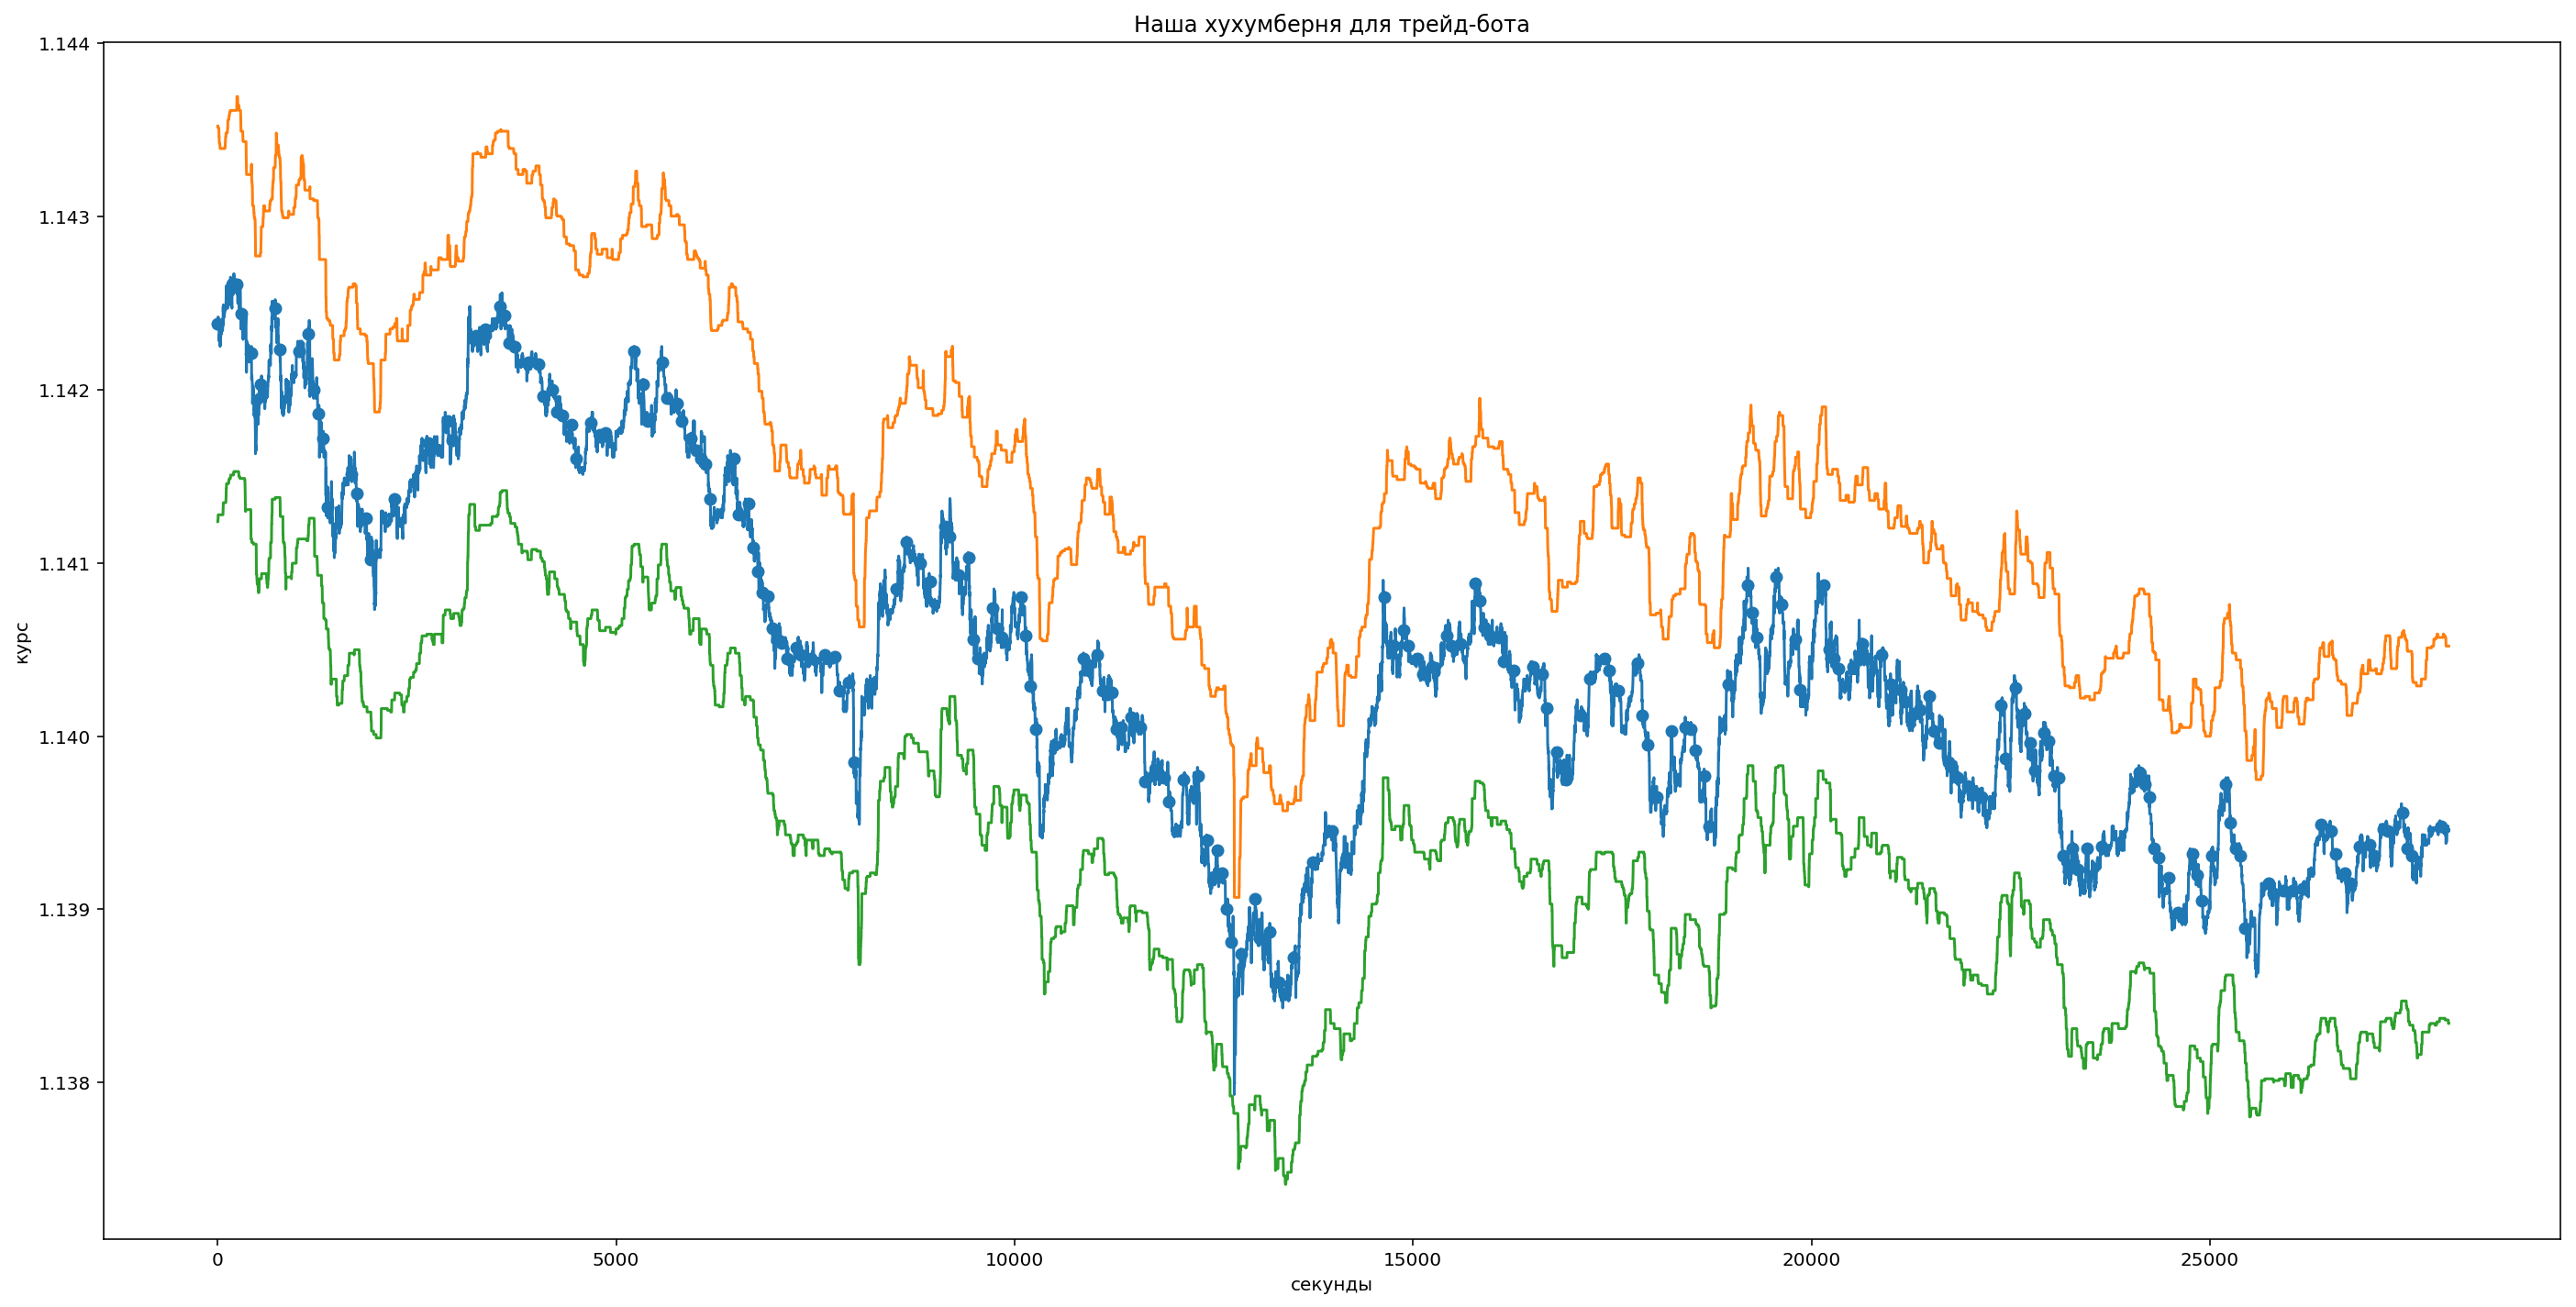

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

a = []
work_np = []
i = 0
j = 0
fi = 0
indexinger = 0
stavka = 0
stroka = ''
koridor = np.array([])
sr_zn_kor = np.array([])
sr_zn_kor_min = np.array([])
sr_zn_kor_max = np.array([])
prob_kor = np.array([])
our_index = np.array([])
uspech_stavki = np.array([])
neuspech_stavki = np.array([])
our_uspech_index = np.array([])
mnenie_mass = np.array([])
dinamika_mass = np.array([])
mass = []
is_stavka = False
stavka_vverh = False
stavka_vniz = False
our_ti = 60
first = 0
last = 28000
our_kor_len = 60

f = open('OlimpGrafik2_sverka.txt')
for line in f:
    line = line.replace('\n', '')
    mass.append([line.split(': ')])

mass = np.array(mass)

mass_mod = mass[:,0][:,1]
mnenie_mass = mass[:,0][:,2]

mass_mod = np.array(mass_mod, dtype=float)
mnenie_mass = np.array(mnenie_mass, dtype=int)
mnenie_mass = mnenie_mass[first:last]


last = len(mnenie_mass)

viborka = mass_mod[first:last]

for stroka in viborka:
    
    if indexinger%our_ti == 0:
        dinamika = stroka-viborka[indexinger-our_ti]
        if dinamika<0:
            dinamika_mass = np.append(dinamika_mass, dinamika*(-1))
        else:
            dinamika_mass = np.append(dinamika_mass, dinamika)
            
        if len(dinamika_mass)>our_ti:
            dinamika_mass = np.delete(dinamika_mass, 0)
        #dinamika = 1.000119
        #print('Динамика : '+str(dinamika))
        
    koridor = np.append(koridor, stroka)
    sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
    dinamika_mean = np.mean(koridor)/1000
    
    sr_zn_kor_min = np.append(sr_zn_kor_min, (np.min(koridor)+dinamika_mean))
    sr_zn_kor_max = np.append(sr_zn_kor_max, (np.max(koridor)-dinamika_mean))
    
    if len(koridor)>our_kor_len:
        koridor = np.delete(koridor, 0)
        
    if len(prob_kor)==0:
        per_pk = stroka
    else:
        per_pk = prob_kor[len(prob_kor)-1]
    
    if stroka>sr_zn_kor_max[indexinger]:
        if stavka == 0:
            prob_kor = np.append(prob_kor, stroka)
            our_index = np.append(our_index, indexinger)
            stavka = 60
            is_stavka = True
            stavka_vverh = True
            
    elif stroka<sr_zn_kor_min[indexinger]:
        if stavka == 0:
            prob_kor = np.append(prob_kor, stroka)
            our_index = np.append(our_index, indexinger)
            stavka = 60
            is_stavka = True
            stavka_vniz = True
            
    if stavka>0:
        stavka-=1
    
    if is_stavka == True and stavka == 0:
        if stavka_vverh == True:
            if per_pk>stroka:
                uspech_stavki = np.append(uspech_stavki, per_pk)
                our_uspech_index = np.append(our_uspech_index, indexinger-59)
            if per_pk<stroka:
                neuspech_stavki = np.append(neuspech_stavki, per_pk)
            stavka_vverh = False
        elif stavka_vniz == True:
            if per_pk<stroka:
                uspech_stavki = np.append(uspech_stavki, per_pk)
                our_uspech_index = np.append(our_uspech_index, indexinger-59)
            if per_pk>stroka:
                neuspech_stavki = np.append(neuspech_stavki, per_pk)
            stavka_vniz = False
        is_stavka = False
            
        
    indexinger+=1

print(len(uspech_stavki))
print(len(neuspech_stavki))
print(len(sr_zn_kor))
print(len(viborka))
print(len(prob_kor))
print(len(our_index))
print(mass_mod[1848+60])

plt.plot(mass_mod[first:last])
plt.plot(sr_zn_kor_min)
plt.plot(sr_zn_kor_max)
plt.scatter(our_uspech_index,uspech_stavki)
plt.xlabel('секунды')
plt.ylabel('курс')
plt.title('Наша хухумберня для трейд-бота')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.dpi"] = 144.0
plt.show()

In [1]:
a = 1000
i=0
m=0
sum = len(uspech_stavki)
anti_sum = len(neuspech_stavki)

m=((a*0.1)*0.82)*sum
n=(a*0.1)*anti_sum
    
print(m-n)
print(sum, anti_sum)

NameError: name 'uspech_stavki' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random


def vibork(viborka, our_ti, our_kor_len, our_wait, wait, kol_pov, kol_pon, porog_kol, indexinger, mnenie_mass, is_visual, ot, do):
    
    global effec, koeff_1, koeff_2
    koridor = np.array([])
    sr_zn_kor = np.array([])
    sr_zn_kor_min = np.array([])
    sr_zn_kor_max = np.array([])
    prob_kor = np.array([])
    our_index = np.array([])
    uspech_stavki = np.array([])
    neuspech_stavki = np.array([])
    our_uspech_index = np.array([])
    dinamika_mass= np.array([])
    mass = []
    is_stavka = False
    stavka_vverh = False
    stavka_vniz = False
    is_prob_kor_vverh = False
    is_prob_kor_vniz = False
    stavka = 0
    indexinger = 0
    stroka = ''
    
    for stroka in viborka:
    
        if indexinger%our_ti == 0:
            dinamika = stroka-viborka[indexinger-our_ti]
            if dinamika<0:
                dinamika_mass = np.append(dinamika_mass, dinamika*(-1))
            else:
                dinamika_mass = np.append(dinamika_mass, dinamika)

            if len(dinamika_mass)>our_ti:
                dinamika_mass = np.delete(dinamika_mass, 0)
            #dinamika = 1.000119
            #print('Динамика : '+str(dinamika))

        koridor = np.append(koridor, stroka)
        sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
        dinamika_mean = np.mean(dinamika_mass)/2

        sr_zn_kor_min = np.append(sr_zn_kor_min, (np.mean(koridor)-dinamika_mean))
        sr_zn_kor_max = np.append(sr_zn_kor_max, (np.mean(koridor)+dinamika_mean))

        if len(koridor)>our_kor_len:
            koridor = np.delete(koridor, 0)

        if len(prob_kor)==0:
            per_pk = stroka
        else:
            per_pk = prob_kor[len(prob_kor)-1]

        if stroka>sr_zn_kor_max[indexinger] and mnenie_mass[indexinger]<40 and stavka == 0:
            prob_kor = np.append(prob_kor, stroka)
            our_index = np.append(our_index, indexinger)
            stavka = 60
            is_stavka = True
            stavka_vniz = True

        elif stroka<sr_zn_kor_min[indexinger] and mnenie_mass[indexinger]>60 and stavka == 0:
            prob_kor = np.append(prob_kor, stroka)
            our_index = np.append(our_index, indexinger)
            stavka = 60
            is_stavka = True
            stavka_vverh = True

        if stavka>0:
            stavka-=1

        if is_stavka == True and stavka == 0:
            if stavka_vverh == True:
                if per_pk>stroka:
                    uspech_stavki = np.append(uspech_stavki, per_pk)
                    our_uspech_index = np.append(our_uspech_index, indexinger-59)
                if per_pk<stroka:
                    neuspech_stavki = np.append(neuspech_stavki, per_pk)
                stavka_vverh = False
            elif stavka_vniz == True:
                if per_pk<stroka:
                    uspech_stavki = np.append(uspech_stavki, per_pk)
                    our_uspech_index = np.append(our_uspech_index, indexinger-59)
                if per_pk>stroka:
                    neuspech_stavki = np.append(neuspech_stavki, per_pk)
                stavka_vniz = False
            is_stavka = False


        indexinger+=1
    
    if len(prob_kor>0):
        effec = np.append(effec, (len(uspech_stavki)/len(prob_kor)*100))
        koeff_1 = np.append(koeff_1, our_ti)
        koeff_2 = np.append(koeff_2, our_kor_len)
        
    if is_visual == True:
        otobr(mass_mod, sr_zn_kor, sr_zn_kor_min, sr_zn_kor_max, our_index, prob_kor, our_uspech_index, uspech_stavki)
    
    
    #print(np.max(effec))
    #print(len(effec))

    #print(len(uspech_stavki))
    #print(len(neuspech_stavki))
    #print(len(sr_zn_kor))
    #print(len(viborka))
    #print(len(prob_kor))
    #print(len(our_index))
    #print(mass_mod[1848+60])

def otobr(mass_mod, sr_zn_kor, sr_zn_kor_min, sr_zn_kor_max, our_index, prob_kor, our_uspech_index, uspech_stavki, ot, do):
    plt.plot(mass_mod[ot:do])
    plt.plot(sr_zn_kor)
    plt.plot(sr_zn_kor_min)
    plt.plot(sr_zn_kor_max)
    plt.scatter(our_index,prob_kor)
    plt.scatter(our_uspech_index,uspech_stavki)
    plt.xlabel('секунды')
    plt.ylabel('курс')
    plt.title('Наша хухумберня для трейд-бота')
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 24
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams["figure.dpi"] = 144.0
    plt.show()

global effec, koeff_1, koeff_2
a = []
work_np = []
i = 0
j = 0
fi = 0
indexinger = 0
stavka = 0
stroka = ''
koridor = np.array([])
sr_zn_kor = np.array([])
sr_zn_kor_min = np.array([])
sr_zn_kor_max = np.array([])
prob_kor = np.array([])
our_index = np.array([])
uspech_stavki = np.array([])
neuspech_stavki = np.array([])
our_uspech_index = np.array([])
mnenie_mass = np.array([])
effec = np.array([])
koeff_1 = np.array([])
koeff_2 = np.array([])
mass = []
is_stavka = False
stavka_vverh = False
stavka_vniz = False
is_prob_kor_vverh = False
is_prob_kor_vniz = False
is_visual = False
our_ti = 30
our_kor_len = 30
our_wait = 6
wait = 0
kol_pov = 0
kol_pon = 0
porog_kol = 2
our_test = 130
ot = 0
do = 300

f = open('OlimpGrafik2.txt')
for line in f:
    line = line.replace('\n', '')
    mass.append([line.split(': ')])

mass = np.array(mass)

mass_mod = mass[:,0][:,1]
mnenie_mass = mass[:,0][:,2]

mass_mod = np.array(mass_mod, dtype=float)
mnenie_mass = np.array(mnenie_mass, dtype=int)

while do<len(mnenie_mass):
    viborka = mass_mod[ot:do]

    while i <= our_test:
        while j <= our_test:
            vibork(viborka, (our_ti+i), (our_kor_len+j), our_wait, wait, kol_pov, kol_pon, porog_kol, indexinger, mnenie_mass, is_visual, ot, do)
            if np.max(effec)>90:
                ef_max = np.max(effec)
                idx1 = list(effec).index(ef_max)
                idx2 = list(effec).index(ef_max)
                j = our_test
                i = our_test
                print(str(ef_max)+' '+str(idx1)+' '+str(idx2))
                print(str(koeff_1[idx1]), koeff_2[idx2])
                print(str(ef_max)+' '+str(idx1)+' '+str(idx2))
                print(str(koeff_1[idx1]), koeff_2[idx2])
                ot+=300
                do+=300
                vibork(viborka, int(koeff_1[idx1]), int(koeff_2[idx2]), our_wait, wait, kol_pov, kol_pon, porog_kol, indexinger, mnenie_mass, True, ot, do)
            elif i == 160 and j == 160:
                ef_max = np.max(effec)
                idx1 = list(effec).index(ef_max)
                idx2 = list(effec).index(ef_max)
                print(str(ef_max)+' '+str(idx1)+' '+str(idx2))
                print(str(koeff_1[idx1]), koeff_2[idx2])
                ot+=300
                do+=300
                vibork(viborka, int(koeff_1[idx1]), int(koeff_2[idx2]), our_wait, wait, kol_pov, kol_pon, porog_kol, indexinger, mnenie_mass, True, ot, do)
            j+=1
            #print(j, (our_kor_len+j), (our_ti+i))
        i+=1
        j=0
        #print(i, (our_kor_len+j), (our_ti+i))

KeyboardInterrupt: 